In [1]:
import re
import numpy as np
import pandas as pd
import openpyxl

import geopandas as gpd
#from shapely.geometry import Point
#from shapely import wkt
#import geographiclib
#from geographiclib.geodesic import Geodesic
#import utm
#from shapely.ops import nearest_points

import sys
import os
import requests
from bs4 import BeautifulSoup
from lxml import html
import warnings

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#import urbanpy as up
import contextily as ctx

import io
import json

import plotly.graph_objects as go
import plotly.express as px
import plotly as py

pd.set_option('display.max_rows',999)
pd.set_option('display.min_rows',4)
pd.set_option('display.float_format', '{:,.2f}'.format)

warnings.filterwarnings("ignore")

20 colores

In [2]:
cl = [e for e in sns.color_palette('rocket',20)]
cl2 = [(int(t[0]*255), int(t[1]*255) , int(t[2]*255)) for t in cl]
colors = ['#%02x%02x%02x' % e for e in cl2]

idx

In [3]:
idx = pd.IndexSlice

Bases

In [4]:
dbox = r'c:/Users/Franco/Dropbox/files/clean/'
files = os.listdir(dbox)

In [7]:
sectores = pd.read_excel(dbox+'sectores.xlsx',index_col=[0,1])
laboral = pd.read_excel(dbox+'laboral_final(ajustes).xlsx',index_col=[0,1])
acceso = pd.read_excel(dbox+'accesom_2.xlsx',index_col=[0,1])
accesom = pd.read_excel(dbox+'horas_msII.xlsx',index_col=[0,1]) 
cw = pd.read_excel(dbox+'cwpops.xlsx',index_col=[0,1])
latlongs = pd.read_excel(dbox+'latlongs.xlsx',index_col=[0,1])
msa = pd.read_excel(dbox+'metro_areas.xlsx',index_col=[0,1])

In [12]:
prope_com = pd.read_excel(dbox+'prope/comercial/properati_i.xlsx',index_col=[0,1])
prope_vi = pd.read_csv(dbox+'prope/vivienda/salariosxviviendaII.csv',index_col=[0,1])

In [59]:
es = pd.read_excel(dbox+'es.xlsx',index_col=[0,1])

### Ciudades de referencia

In [32]:
ref = ['Gran Cordoba','Gran Tucuman-Tafi Viejo','Gran Rosario','Gran Mendoza','Mar del Plata-Batan','Bahia Blanca-Cerri','Vitoria','Cali','San Luis Potosi']
ref_prom = ref + ['Promedio Argentina','Promedio Latam']

In [9]:
comp = cw.loc[idx[:,ref],'pops'].to_frame().join(laboral.loc[:,['Salario Horario (PPP 2011)','Tasa de Desempleo Total','% población con secundario completo Total']]).join(acceso.loc[:,['cutoff_0','cutoff_9']]).join(sectores.loc[:,['Ratio Agro','Ratio Baja Tec','Ratio Resto Ind']])

In [10]:
comp = comp.rename(columns={'pops':'Población estimada (millones)','cutoff_0':'Masa Salarial como proporción del país','cutoff_9':'Proporción de la masa salarial del país a la que se accede en < 9 hs'})

In [515]:
print(BeautifulSoup(comp.sort_values(['Country','Salario Horario (PPP 2011)']).to_html(), 'html.parser'))

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th></th>
<th>Población estimada (millones)</th>
<th>Salario Horario (PPP 2011)</th>
<th>Tasa de Desempleo Total</th>
<th>% población con secundario completo Total</th>
<th>Masa Salarial como proporción del país</th>
<th>Proporción de la masa salarial del país a la que se accede en &lt; 9 hs</th>
<th>Ratio Agro</th>
<th>Ratio Baja Tec</th>
<th>Ratio Resto Ind</th>
</tr>
<tr>
<th>Country</th>
<th>City</th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<th rowspan="6" valign="top">Argentina</th>
<th>Gran Tucuman-Tafi Viejo</th>
<td>1.45</td>
<td>4.45</td>
<td>10.32</td>
<td>42.95</td>
<td>0.04</td>
<td>0.13</td>
<td>0.96</td>
<td>0.89</td>
<td>0.97</td>
</tr>
<tr>
<th>Gran Cordoba</th>
<td>1.43</td>
<td>4.64</td>
<td>12.75</td>
<td>46.18</td>
<td>0.04</td>
<td>0.87</td>
<td>0.31</td>
<td>1.09</td>
<td>1.51</td>
</tr>
<tr>
<th>Gran 

Gráfico de Salarios y poblaciones

In [29]:
plot1 = comp.iloc[:,:2].droplevel(0)

In [30]:
proms = pd.concat([cw.loc[:,['pops']].mean().to_frame().T.append(cw.loc['Argentina',['pops']].mean().to_frame().T),pd.Series(laboral.iloc[:,0].mean()).append(pd.Series(laboral.loc['Argentina','Salario Horario (PPP 2011)'].mean())).to_frame()],axis=1).rename(columns={'pops':'Población estimada (millones)',0:'Salario Horario (PPP 2011)'})
proms['City'] = ['Poromedio Latam','Promedio Argentina']
proms = proms.set_index('City')

In [31]:
plot1 = plot1.append(proms)

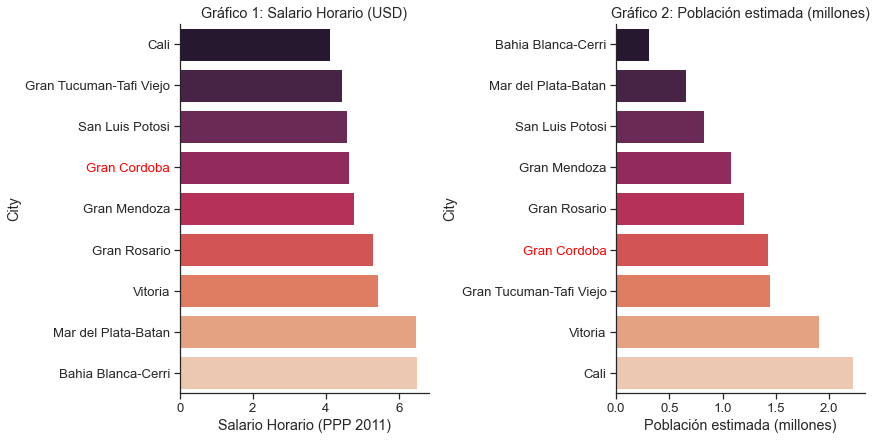

In [116]:
f, axes = plt.subplots(1, 2,figsize=(12,6) ,constrained_layout=True)

sns.barplot(x='Salario Horario (PPP 2011)', y=plot1.sort_values('Salario Horario (PPP 2011)').index, data=plot1.sort_values('Salario Horario (PPP 2011)'),palette='rocket' , orient='h' , ax=axes[0]).set_title('Gráfico 1: Salario Horario (USD)')
sns.barplot(x='Población estimada (millones)', y=plot1.sort_values('Población estimada (millones)').index, data=plot1.sort_values('Población estimada (millones)'),palette='rocket' , orient='h'  ,ax=axes[1]).set_title('Gráfico 2: Población estimada (millones)')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

plt.ticklabel_format(style='plain', axis='x')
#plt.tight_layout()
#axes[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].get_yticklabels()[3].set_color('red')
axes[1].get_yticklabels()[5].set_color('red')

plt.savefig("informe/images/wyp.png",bbox_inches='tight')

Scatter

In [11]:
wage_comp = sectores.loc[idx['Argentina',:],['Salario Observado','Salario Estimado','Principal Sector']]
wage_comp = wage_comp.reset_index()

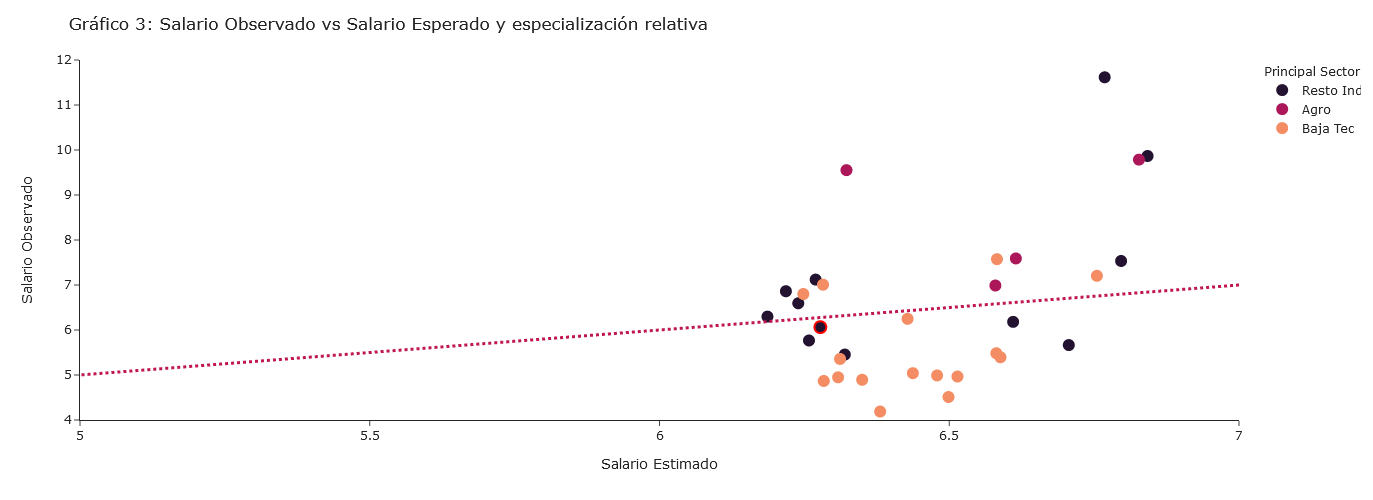

In [13]:
fig = px.scatter(wage_comp[wage_comp['City']!='Gran Cordoba'], x="Salario Estimado", y="Salario Observado", color="Principal Sector",
                 hover_data=["City","Salario Observado","Salario Estimado","Principal Sector"],
                 template='simple_white',color_discrete_sequence=[colors[1],colors[8],colors[15]],
                 width=750,
                 height=500
                )

fig.add_trace(
        go.Scatter(
        mode='markers',
        x=wage_comp[wage_comp['City']=='Gran Cordoba']['Salario Estimado'],
        y=wage_comp[wage_comp['City']=='Gran Cordoba']['Salario Observado'],
        marker=dict(
            color=colors[1],
            size=12,
            line=dict(
                color='red',
                width=2
            )
        ),
        showlegend=False,
        text='City: {0}<br />Salario Observado: {1}<br />Salario Estimado: {2}<br />Principal Sector: {3}'.format('Gran Cordoba', 6.06, 6.28, 'Ratio Resto Ind'),
        hoverinfo='text'
    )
)



fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers')
                 )

fig.update_layout(xaxis_range=[5,7],
                  yaxis_range=[4,12],
                  title='Gráfico 3: Salario Observado vs Salario Esperado y especialización relativa'
                 )


fig.add_shape( # add a "target" line
    type="line", line_color=colors[9], line_width=3, opacity=1, line_dash="dot",
    x0=3, x1=12, xref="x", y0=3, y1=12, yref="y"
)

fig.show()
fig.write_html(file="informe/images/estimado_vs_observado.html",full_html=False,include_plotlyjs='cdn')

Sectores

In [148]:
w_cordoba = sectores.loc[idx[:,'Gran Cordoba'],['share_emp_s1', 'share_emp_s2', 'share_emp_s3', 'share_emp_s4',
       'share_emp_s5', 'share_emp_s6', 'share_emp_s7', 'share_emp_s8',
       'share_emp_s9', 'share_emp_s10','Agro', 'Baja Tec', 'Resto Ind',
       'Construcción', 'Comercio', 'Infraestructura', 'Bancos', 'Adm publi',
       'Educ y Salud', 'Serv doméstic']].stack().to_frame().reset_index().rename(columns={'level_2':'Actividad',0:'Proporción'})

In [149]:
w_cordoba['Grupo'] = ['Empleo']*10 + ['Masa Salarial']*10

In [150]:
w_cordoba = w_cordoba.drop(columns=['Country','City'])

In [151]:
w_cordoba = w_cordoba.replace({'Actividad':dict(zip(w_cordoba['Actividad'][:10],w_cordoba['Actividad'][10:]))})

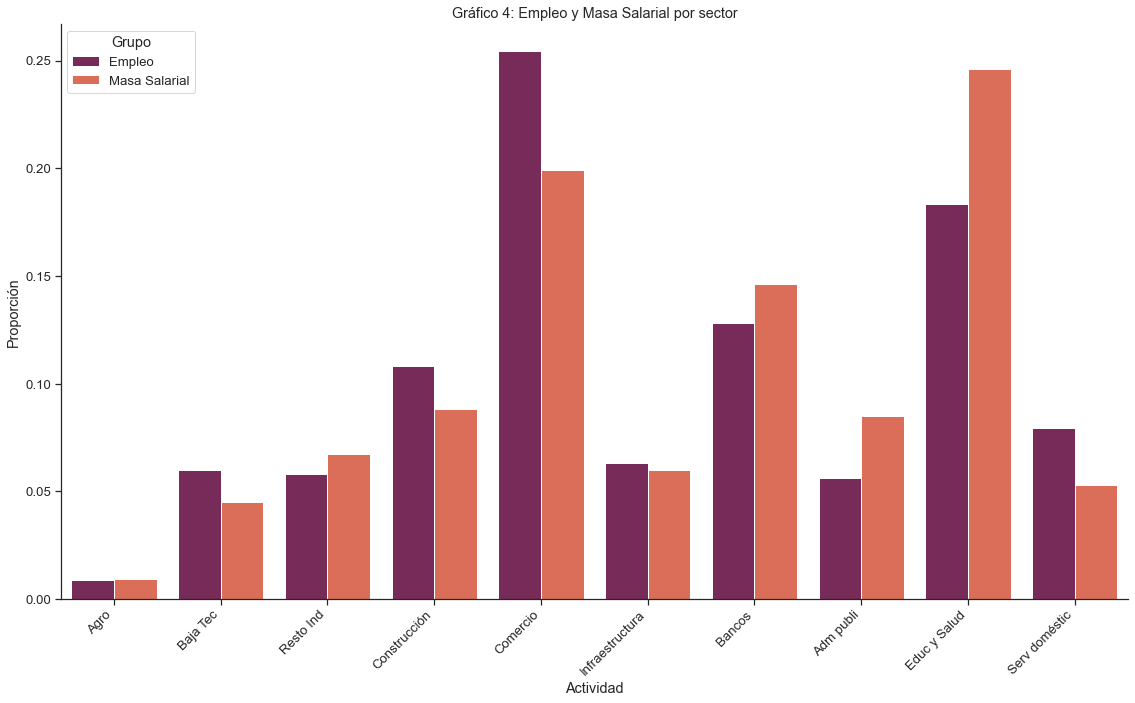

In [152]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x='Actividad', y='Proporción', hue='Grupo', data=w_cordoba , palette='rocket' , linewidth=1)

g.set_title('Gráfico 4: Empleo y Masa Salarial por sector')
g.set_xticklabels(w_cordoba['Actividad'].unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.savefig("informe/images/wm_sectores.png",bbox_inches='tight')
plt.tight_layout()

Distribución de Actividades

In [158]:
dist = laboral[['Distribución de ocupados según relación laboral Asalariado  (total)',
 'Distribución de ocupados según relación laboral Asalariado (público)',
 'Distribución de ocupados según relación laboral Asalariado (privado)',
 'Distribución de ocupados según relación laboral Patrón o Cuentapropista',
 'Distribución de ocupados según relación laboral Sin salario']].droplevel(0)

In [159]:
mean = dist.mean().to_frame().T
mean['City'] = 'Promedio Latam'
mean = mean.set_index('City')

In [160]:
dist_plot = dist.loc[ref,:].append(dist.loc[('Argentina 2019 (total ciudades)')].to_frame().T.reset_index().rename(columns={'index':'City'}).replace({'City':{'Argentina 2019 (total ciudades)':'Promedio Argentina'}}).set_index('City').append(mean))

In [161]:
dist_plot = dist_plot.sort_values('Distribución de ocupados según relación laboral Asalariado  (total)')

In [162]:
dist_plot = dist_plot.drop(columns='Distribución de ocupados según relación laboral Asalariado  (total)')

In [163]:
dist_plot = dist_plot.rename(columns=dict(zip(dist_plot.columns.tolist(),['Asalariado (público)','Asalariado (privado)','Patrón o Cuentapropista','Sin salario'])))

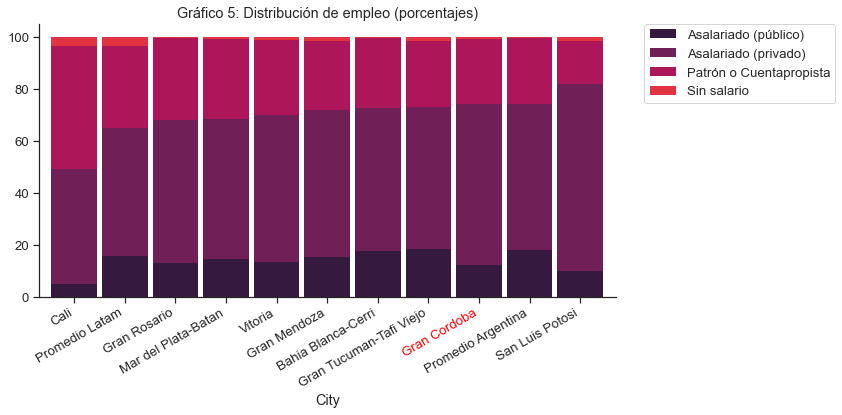

In [164]:
sns.set_palette('rocket')

fig, ax = plt.subplots(1, 1,figsize=(12,6))

dist_plot.plot(kind='bar', stacked=True , ax=ax , color=sns.color_palette() , width=0.9 , linewidth=0.001).set_title('Gráfico 5: Distribución de empleo (porcentajes)')

fig.autofmt_xdate()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().get_xticklabels()[8].set_color('red')

plt.tight_layout()
plt.savefig("informe/images/empleo_dist.png",bbox_inches='tight')

## Disponibilidad de indicadores

### Con Ext

In [165]:
mlab = pd.read_excel(dbox+'mlabi.xlsx',index_col=[0,1])

Medias

In [166]:
mlab_medias = mlab.mean().to_frame().T.append(mlab.loc['Argentina'].mean().to_frame().T)

In [167]:
mlab_medias['City'] = ['Promedio Latam','Promedio Argentina']

In [168]:
mlab_medias = mlab_medias.set_index(['City'])

Append

In [169]:
mlab_plot = mlab.drop(columns='City Original').droplevel(0).append(mlab_medias).loc[ref_prom,'Median Download'].to_frame()

Plot

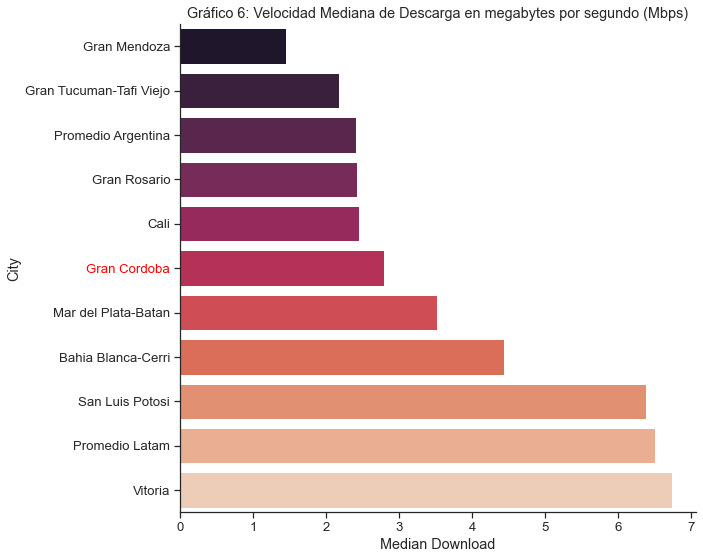

In [171]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Median Download', y=mlab_plot.sort_values('Median Download').index, data=mlab_plot.sort_values('Median Download') , palette='rocket' , orient='h' ).set_title('Gráfico 6: Velocidad Mediana de Descarga en megabytes por segundo (Mbps)')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[5].set_color('red')

plt.savefig("informe/images/descarga.png",bbox_inches='tight')

### Acceso a mercados

In [153]:
medias = accesom.loc['Argentina'].mean().to_frame().T.append(accesom.mean().to_frame().T)
medias['City'] = ['Promedio Argentina','Promedio Latam']
medias = medias.set_index(['City'])

In [154]:
acceso_plot = accesom.droplevel(0).append(medias).loc[ref_prom]
plot = acceso_plot.drop(columns=['Población (millones)','Salario Horario (PPP 2011)','Nearest City','Masa Salarial','Masa Salarial (% Total País)','Masa Salarial (Total País)'])

In [155]:
df1 = plot.loc[:,['Horas al {}% de MS'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]]]
df2 = plot.loc[:,['Horas al {}% de MS (Salarios mayores)'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]]]

mydict1 = dict(zip(['Horas al {}% de MS'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]],['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']))
mydict2 = dict(zip(['Horas al {}% de MS (Salarios mayores)'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]],['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']))

df1 = df1.rename(columns=mydict1).stack().to_frame().reset_index().rename(columns={'level_1':'% de MS',0:'Horas'})
df2 = df2.rename(columns=mydict2).stack().to_frame().reset_index().rename(columns={'level_1':'% de MS',0:'Horas'})

In [156]:
#dict_c = dict(zip(acceso_plot['% de masa salarial'].unique().tolist(),[colors[2],colors[6],colors[12],colors[16]]))
#cols = [colors[e] for e in [0,1,3,5,7,9,11,13,15,17,19]] 

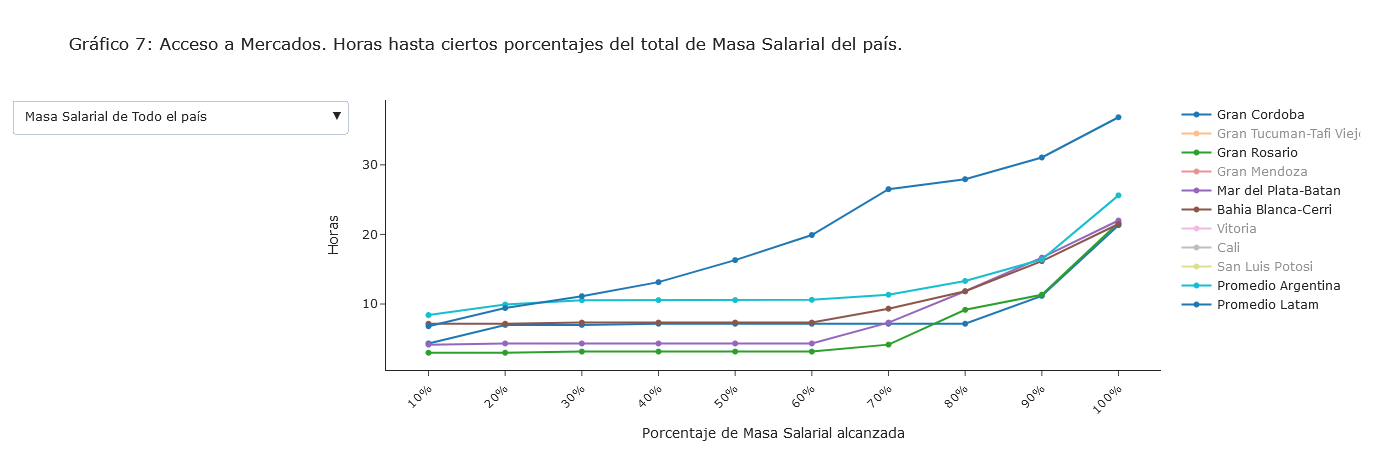

In [161]:
fig1 = go.Figure()

for e in df1['City'].unique():
    df = df1[df1['City']==e]
    if e in ['Cali','San Luis Potosi','Vitoria','Gran Tucuman-Tafi Viejo','Gran Mendoza']:
        fig1.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))
    else:    
        fig1.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))

fig2 = go.Figure()

for e in df2['City'].unique():
    df = df2[df2['City']==e]
    if e in ['Cali','San Luis Potosi','Vitoria','Gran Tucuman-Tafi Viejo','Gran Mendoza']:
        fig2.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))
    else:    
        fig2.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))

        
fig = go.Figure()

for e in df1['City'].unique():
    df = df1[df1['City']==e]
    if e in ['Cali','San Luis Potosi','Vitoria','Gran Tucuman-Tafi Viejo','Gran Mendoza']:
        fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))
    else:    
        fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
        
        
updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'Masa Salarial de Todo el país',
                'args': [
                    {'y': [dat.y for dat in fig1.data],
                     'x': [dat.x for dat in fig1.data],
                     'visible':[dat.visible for dat in fig1.data]
                     
                    },  
                ]
            },
            {
                'method': 'update',
                'label': 'Masa Salarial sólo de Ciudades con salarios mayores',
                'args': [
                    {'y': [dat.y for dat in fig2.data],
                     'x':[dat.x for dat in fig2.data],
                     'visible':[dat.visible for dat in fig2.data]
                     
                    },
                ]
            }

        ],
        'direction': 'down',
        'showactive': True,
    }
]        
        
fig = fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text="Gráfico 7: Acceso a Mercados. Horas hasta ciertos porcentajes del total de Masa Salarial del país." , xaxis={'tickangle':-45} , yaxis_title="Horas" , xaxis_title="Porcentaje de Masa Salarial alcanzada" ) #, xaxis_range=[-0.1,5] , yaxis_range=[0,20]
fig.write_html(file="informe/images/accesoII.html",full_html=False,include_plotlyjs='cdn')

fig.show()

In [160]:
#fig = go.Figure()#

#for e in df1['City'].unique():
#    df = df1[df1['City']==e]
#    if e in ['Cali','San Luis Potosi','Vitoria','Gran Tucuman-Tafi Viejo','Gran Mendoza']:
#        fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))
#    else:    
#        fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
    
#fig.update_layout(template="simple_white" , title_text="Gráfico 7: Acceso a Mercados. Horas hasta ciertos porcentajes del total de Masa Salarial del país." , xaxis={'tickangle':-45} , yaxis_title="Horas" , xaxis_title="Porcentaje de Masa Salarial alcanzada" , xaxis_range=[-0.1,5] , yaxis_range=[0,20])

#fig.show()

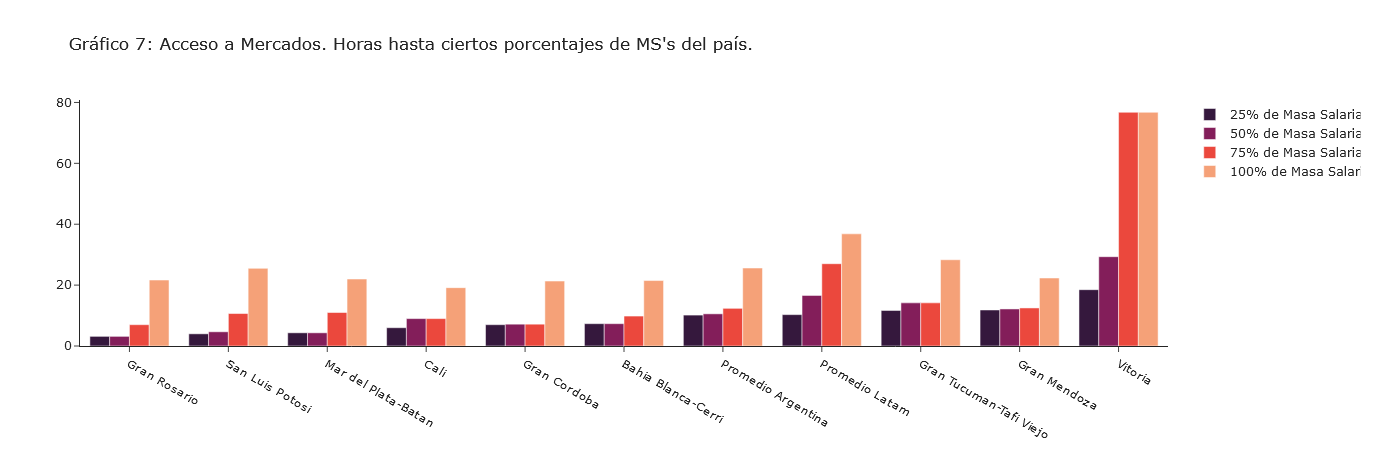

In [270]:
fig = go.Figure()

for h in acceso_plot['% de masa salarial'].unique():
    df = acceso_plot[acceso_plot['% de masa salarial']==h]
    fig.add_traces(go.Bar(name=h, x=df.index, y=df['horas'],marker_color=dict_c[h]))

fig.update_layout(title="Gráfico 7: Acceso a Mercados. Horas hasta ciertos porcentajes de MS's del país.",template="simple_white")
fig.write_html(file="informe/images/acceso.html",full_html=False,include_plotlyjs='cdn')

fig.show()

### Conectividad Interna

Biggest Obstacle

In [261]:
plot = es.loc[:,'Percent of firms choosing transportation as their biggest obstacle'].to_frame()

In [262]:
means = plot.mean().T.to_frame().append(plot.loc['Argentina'].mean().T.to_frame()).rename(columns={0:'Percent of firms choosing transportation as their biggest obstacle'})

In [263]:
means['City'] = ['Promedio Latam','Promedio Argentina']

In [264]:
plot = plot.droplevel(0).append(means.set_index('City'))

In [267]:
ref_es = ref_prom[:4] + ['Ciudad de Buenos Aires','Cali','Parana']+ ref_prom[-2:] 

In [268]:
plotloc = plot.loc[ref_es].reset_index().replace({'City':{'Parana':'Estado de Parana (Curitiba)'}}).sort_values('Percent of firms choosing transportation as their biggest obstacle')

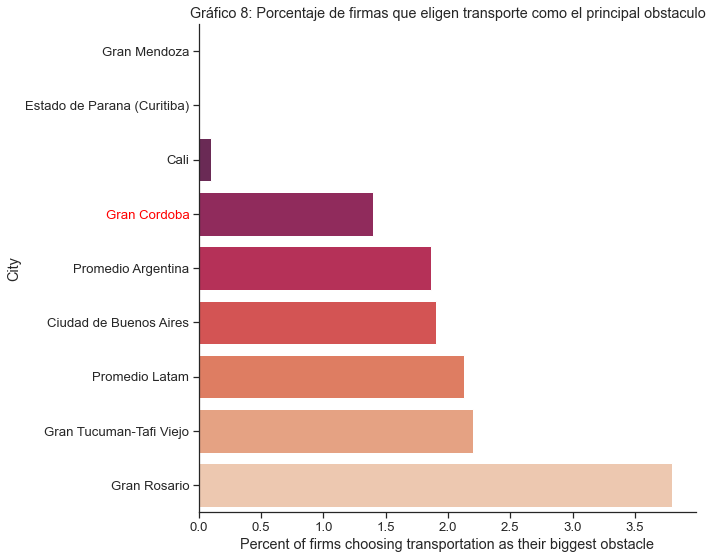

In [279]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Percent of firms choosing transportation as their biggest obstacle', y='City', data=plotloc , palette='rocket' , orient='h' ).set_title('Gráfico 8: Porcentaje de firmas que eligen transporte como el principal obstaculo')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[3].set_color('red')

plt.savefig("informe/images/big_obs_trans.png",bbox_inches='tight')

### Trabajo y Conocimiento

In [60]:
plot = es.loc[:,'Percent of firms choosing inadequately educated workforce as their biggest obstacle'].to_frame()

In [61]:
means = plot.mean().T.to_frame().append(plot.loc['Argentina'].mean().T.to_frame()).rename(columns={0:'Percent of firms choosing inadequately educated workforce as their biggest obstacle'})

In [62]:
means['City'] = ['Promedio Latam','Promedio Argentina']

In [63]:
plot = plot.droplevel(0).append(means.set_index('City'))

In [64]:
ref_es = ref_prom[:4] + ref_prom[-2:] 

In [65]:
plotloc = plot.loc[ref_es].reset_index().replace({'City':{'Parana':'Estado de Parana (Curitiba)'}}).sort_values('Percent of firms choosing inadequately educated workforce as their biggest obstacle')

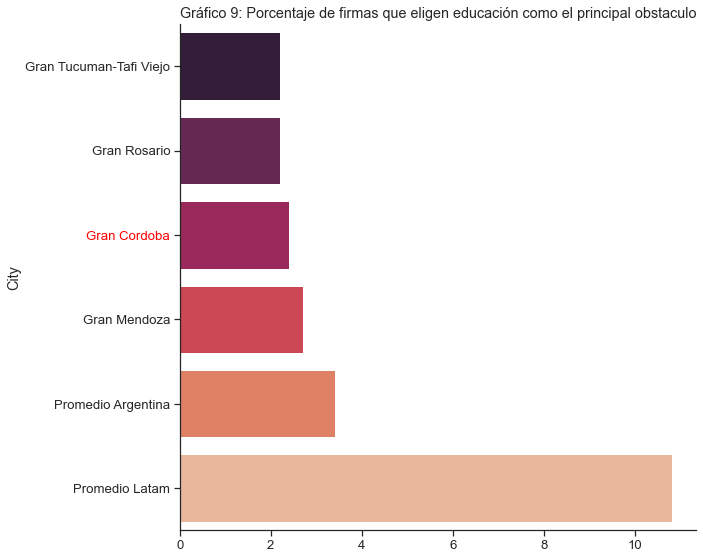

In [72]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Percent of firms choosing inadequately educated workforce as their biggest obstacle', y='City', data=plotloc , palette='rocket' , orient='h' ).set_title('Gráfico 9: Porcentaje de firmas que eligen educación como el principal obstaculo')

sns.set(font_scale=1.2)
ax.set_xlabel('')
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[2].set_color('red')

plt.savefig("informe/images/big_obs_edu.png",bbox_inches='tight')

Laboral

In [280]:
medias = laboral.reset_index().loc[laboral.reset_index()['City'].str.contains('(total ciudades)|(Total Ciudades)')].iloc[0,:].to_frame().T.append(laboral.reset_index().loc[laboral.reset_index()['City'].str.contains('(total ciudades)|(Total Ciudades)')].mean().to_frame().T)

In [281]:
medias = medias.drop(columns='Country')
medias['City'] = ['Promedio Argentina','Promedio Latam']

In [282]:
laboral_ref = laboral.droplevel(0).append(medias.set_index('City')).loc[ref_prom,:]

Act

In [283]:
act = laboral_ref[laboral_ref.columns[4:7]]
act['dif'] = act['Tasa de Actividad Hombres'] - act['Tasa de Actividad Mujeres ']
act = act.sort_values('Tasa de Actividad Total')

In [284]:
act['Tasa de Actividad (total)'] = act['Tasa de Actividad Total'] * (-1)

In [285]:
act = act.astype('float')

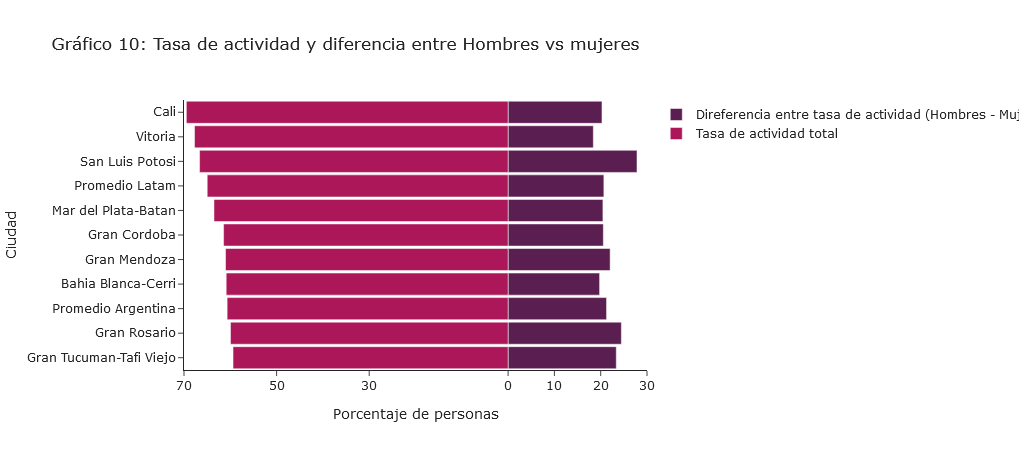

In [287]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-70, 30],
                       tickvals=[-70, -50, -30, 0, 10, 20, 30],
                       ticktext=[70, 50, 30, 0, 10, 20, 30],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 10: Tasa de actividad y diferencia entre Hombres vs mujeres'
                  )

data = [go.Bar(y=act.index,
               x=act['dif'],
               orientation='h',
               name='Direferencia entre tasa de actividad (Hombres - Mujeres)',
               text=np.round(act['dif'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=act.index,
               x=act['Tasa de Actividad (total)'],
               orientation='h',
               name='Tasa de actividad total',
               text= np.round(act['Tasa de Actividad (total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]


fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/actividad.html",full_html=False,include_plotlyjs='cdn')
fig.show()

Info y desempleo

In [288]:
des = pd.concat([laboral_ref[laboral_ref.columns[1]],laboral_ref[laboral_ref.columns[7]]],axis=1)

In [289]:
des = des.astype('float')

In [290]:
des = des.sort_values('Tasa de Desempleo Total')

In [291]:
des['Tasa de Desempleo (Total)'] = des['Tasa de Desempleo Total'] * (-1)

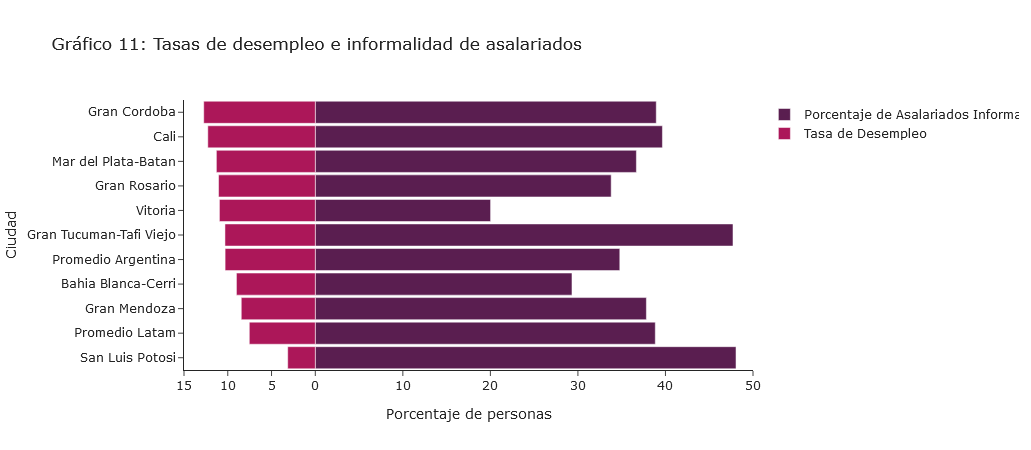

In [292]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-15, 50],
                       tickvals=[-15, -10, -5, 0, 10, 20, 30, 40, 50],
                       ticktext=[15, 10, 5, 0, 10, 20, 30, 40,50],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 11: Tasas de desempleo e informalidad de asalariados'
                  )

data = [go.Bar(y=des.index,
               x=des['% Asalariados Informales Total'],
               orientation='h',
               name='Porcentaje de Asalariados Informales',
               text=np.round(des['% Asalariados Informales Total'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=des.index,
               x=des['Tasa de Desempleo (Total)'],
               orientation='h',
               name='Tasa de Desempleo',
               text= np.round(des['Tasa de Desempleo (Total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]


fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/desempleo.html",full_html=False,include_plotlyjs='cdn')
fig.show()

desempleo etario

In [293]:
deset = laboral_ref.loc[:,['Tasa de Desempleo 15-24','Tasa de Desempleo 25-54','Tasa de Desempleo 55 (+)']].sort_values('Tasa de Desempleo 25-54')

In [294]:
des_plot = deset.stack().to_frame().reset_index().rename(columns={'level_1':'Rango Etario',0:'Porcentaje'}).set_index(['City'])#.sort_values(['City','Rango Etario'])

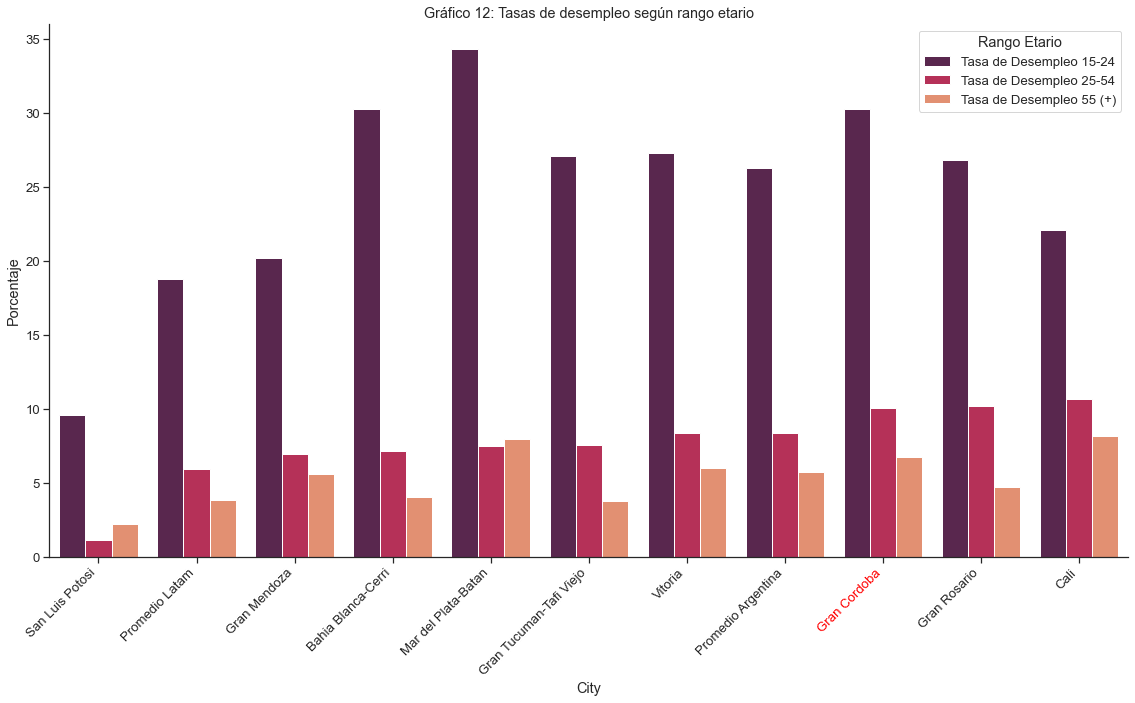

In [295]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x=des_plot.index, y='Porcentaje', hue='Rango Etario', data=des_plot , palette='rocket' , linewidth=1)

g.set_title('Gráfico 12: Tasas de desempleo según rango etario')
g.set_xticklabels(des_plot.index.unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.gca().get_xticklabels()[8].set_color('red')
plt.tight_layout()

plt.savefig("informe/images/des_etario.png",bbox_inches='tight')

Educación

In [296]:
edu = laboral_ref.loc[:,['% población con secundario completo Total','% población con superior completo Total']]

In [297]:
edu = edu.astype('float')

In [298]:
edu = edu.sort_values('% población con secundario completo Total')

In [299]:
edu['% población con secundario completo (total)'] = edu['% población con secundario completo Total'] * (-1)

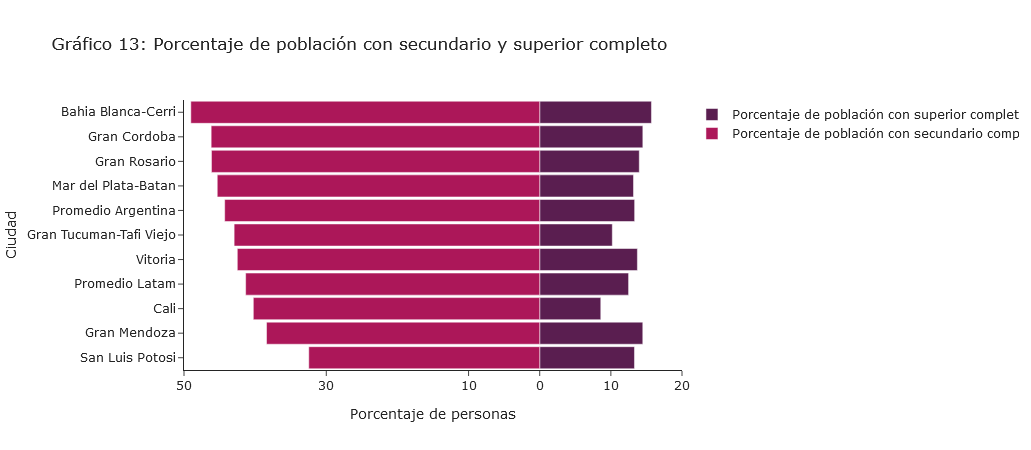

In [300]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-50, 20],
                       tickvals=[-50, -30, -10, 0, 10, 20],
                       ticktext=[50, 30, 10, 0, 10, 20],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 13: Porcentaje de población con secundario y superior completo'
                  )

data = [go.Bar(y=edu.index,
               x=edu['% población con superior completo Total'],
               orientation='h',
               name='Porcentaje de población con superior completo',
               text=np.round(edu['% población con superior completo Total'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=edu.index,
               x=edu['% población con secundario completo (total)'],
               orientation='h',
               name='Porcentaje de población con secundario completo',
               text= np.round(edu['% población con secundario completo (total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]

fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/edu1.html",full_html=False,include_plotlyjs='cdn')
fig.show()

In [301]:
edu2 = laboral_ref.loc[:,['% población con superior completo 25 a 35 años de edad','% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario']].sort_values('% población con superior completo 25 a 35 años de edad')

In [302]:
edu2 = edu2.rename(columns={'% población con superior completo 25 a 35 años de edad':'25-35 años con superior completo','% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario':'18-25 años estudiando terciario/superior'})

In [303]:
edu_plot2 = edu2.stack().to_frame().reset_index().rename(columns={'level_1':'Grupo',0:'Porcentaje'}).set_index(['City'])

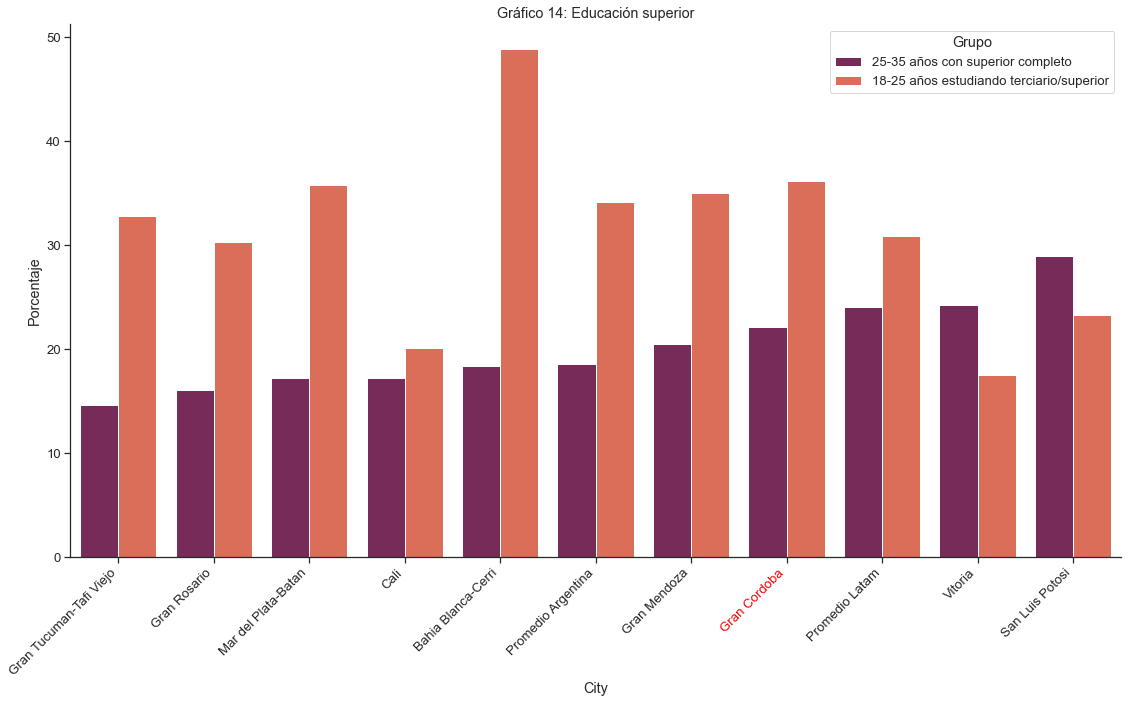

In [304]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x=edu_plot2.index, y='Porcentaje', hue='Grupo', data=edu_plot2 , palette='rocket' , linewidth=1)

g.set_title('Gráfico 14: Educación superior')
g.set_xticklabels(edu_plot2.index.unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.tight_layout()
plt.gca().get_xticklabels()[7].set_color('red')

plt.savefig("informe/images/edu2.png",bbox_inches='tight')

### Conglomerados y Cadenas de Valor

In [306]:
hh = laboral.loc['Argentina','Salario Horario (PPP 2011)'].to_frame().drop(index='Argentina 2019 (total ciudades)').join(sectores.loc[:,['Salario Estimado','HHc/HHp']])

In [307]:
hh = hh.reset_index()

In [308]:
hh = hh.rename(columns={'HHc/HHp':'Índice HH / Índice HH país','Salario Horario (PPP 2011)':'Salario Horario (USD)'})

In [309]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.005, point['y'], str(point['val']))

In [313]:
hh = hh.drop(columns='Country')

In [316]:
hh1 = hh.drop(index=hh[hh['City']=='Gran Cordoba'].index)

In [321]:
hh2 = hh[hh['City']=='Gran Cordoba']

In [333]:
len(sns.color_palette('rocket',1))

1

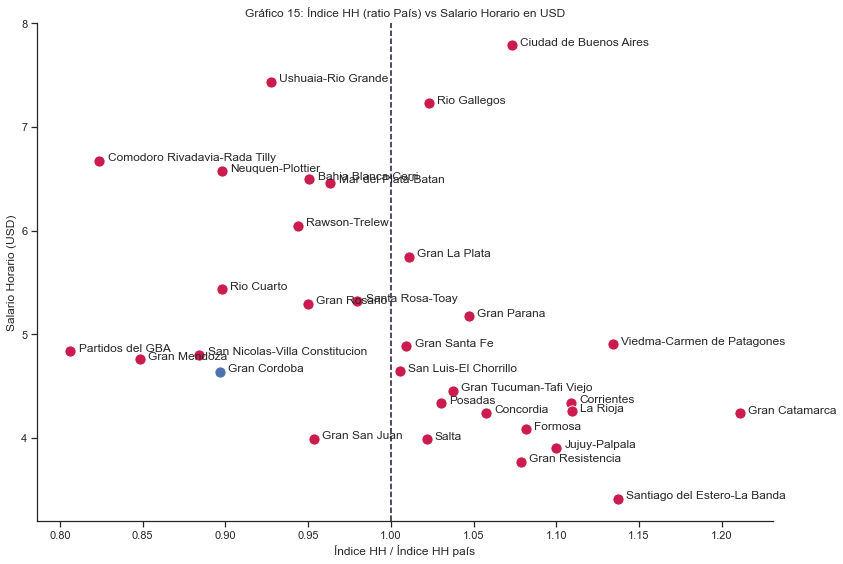

In [337]:
fig, ax = plt.subplots(figsize=(11,8))

sns.scatterplot(data=hh1, x="Índice HH / Índice HH país", y="Salario Horario (USD)" , ax=ax  , s=125 , c=sns.color_palette('rocket',1)).set_title('Gráfico 15: Índice HH (ratio País) vs Salario Horario en USD') #, hue="Principal Sector (3 principales)",   size="Principal Sector (3 principales)" 
sns.scatterplot(data=hh2, x="Índice HH / Índice HH país", y="Salario Horario (USD)" , ax=ax  , s=125)

#plt.legend(bbox_to_anchor=(0.95,0.95), loc="upper right")
plt.tight_layout()
sns.set(font_scale=1.0)
sns.set_style("ticks")
sns.despine()
plt.axvline(x=1,linestyle='--',c=colors[1])

label_point( hh["Índice HH / Índice HH país"] , hh["Salario Horario (USD)"] , hh['City'] , ax)

plt.savefig("informe/images/hh_salario.png",bbox_inches='tight')

# Distribución de masa salarial, empleo y salarios

In [338]:
e = sectores.iloc[:,10:20]

In [339]:
emedias = e.mean().to_frame().T.append(e.loc['Argentina'].mean().to_frame().T)

In [340]:
emedias['City'] = ['Promedio Latam','Promedio Argentina']

In [341]:
e = e.droplevel(0).append(emedias.set_index('City'))

In [342]:
eplot = e.loc[ref_prom]

In [343]:
eplot = eplot.rename(columns=dict(zip(eplot.columns.tolist(),[sectores.columns[31:41].tolist()[e] for e in range(10)])))

In [344]:
eplot['df']='Empleo'

In [345]:
eplot = eplot.loc[['Gran Cordoba','Promedio Argentina','Promedio Latam']].append(eplot.loc[eplot.index.difference(pd.Index(['Gran Cordoba','Promedio Argentina','Promedio Latam']))])

In [346]:
ms = sectores.iloc[:,31:41]

In [347]:
msmedias = ms.mean().to_frame().T.append(ms.loc['Argentina'].mean().to_frame().T)

In [348]:
msmedias['City'] = ['Promedio Latam','Promedio Argentina']

In [349]:
ms = ms.droplevel(0).append(msmedias.set_index('City'))

In [350]:
msplot = ms.loc[ref_prom]

In [351]:
msplot['df']='Masa Salarial'

In [352]:
msplot = msplot.loc[['Gran Cordoba','Promedio Argentina','Promedio Latam']].append(msplot.loc[msplot.index.difference(pd.Index(['Gran Cordoba','Promedio Argentina','Promedio Latam']))])

In [353]:
df = pd.concat([pd.melt(eplot.reset_index().rename(columns={'index':'City'}),id_vars=['df','City']),pd.melt(msplot.reset_index().rename(columns={'index':'City'}),id_vars=['df','City'])],ignore_index=True)

In [354]:
df = df.set_index(['df','City','variable'])

In [355]:
df["vcs"] = df.groupby(level=["df","City"]).cumsum()

In [356]:
df = df.reset_index()

In [357]:
df = df.replace({'Promedio Latam':'P. Latam','Promedio Argentina':'P. Argentina','Bahia Blanca-Cerri':'B. Blanca','Mar del Plata-Batan':'Mar del Plata','Gran Tucuman-Tafi Viejo':'Tucuman'})

In [358]:
colors2 = [colors[e] for e in range(0,20,2)]

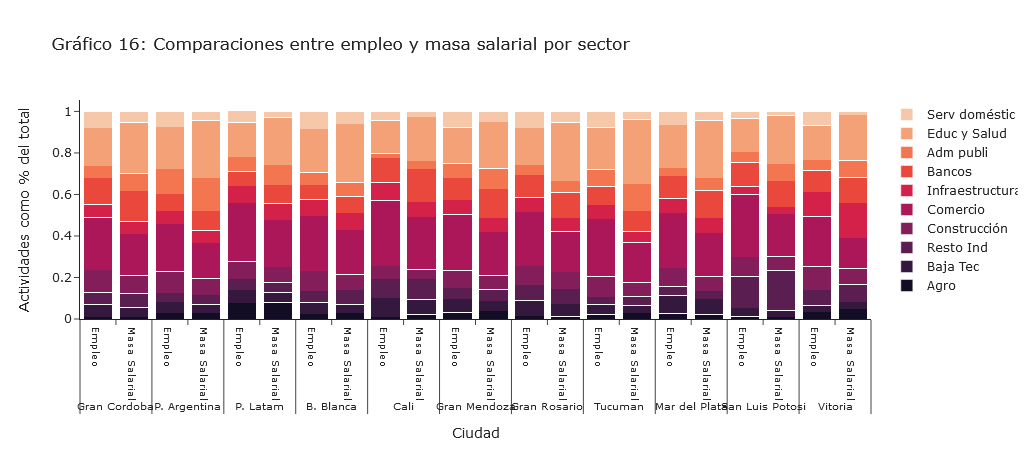

In [361]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Ciudad",tickfont_size=10),
    yaxis=dict(title_text="Actividades como % del total"),
    barmode="stack",
    title_text='Gráfico 16: Comparaciones entre empleo y masa salarial por sector'
)


for r, c in zip(df.variable.unique(), colors2):
    plot_df = df[df.variable == r]
    fig.add_trace(
        go.Bar(x=[plot_df.City, plot_df.df], y=plot_df.value, name=r, marker_color=c),
    )

fig.update_layout() 
fig.write_html("informe/images/empleoymasasalarial.html",full_html=False,include_plotlyjs='cdn')
fig.show()

In [190]:
#print(BeautifulSoup(a, 'html.parser').prettify())

<div>
 <script type="text/javascript">
  window.PlotlyConfig = {MathJaxConfig: 'local'};
 </script>
 <script src="https://cdn.plot.ly/plotly-latest.min.js">
 </script>
 <div class="plotly-graph-div" id="97af1ba3-41a1-4bca-9d8a-87363ff72d30" style="height:100%; width:100%;">
 </div>
 <script type="text/javascript">
  window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("97af1ba3-41a1-4bca-9d8a-87363ff72d30")) {                    Plotly.newPlot(                        "97af1ba3-41a1-4bca-9d8a-87363ff72d30",                        [{"marker": {"color": "#221330"}, "name": "Agro", "type": "bar", "x": [["Armenia", "Bucaramanga", "Ibague", "Manizales", "Medellin", "Monteria", "Pereira", "Tunja", "Villavicencio", "Armenia", "Bucaramanga", "Ibague", "Manizales", "Medellin", "Monteria", "Pereira", "Tunja", "Villavicencio"], ["Empleo", "Empleo", "Empleo", "Empleo", "Empleo", "Empleo", "Empleo", "Empleo", "Empleo", "Masa Salarial", "Masa Salaria

Salarios

In [75]:
salarios = sectores.loc[:,['wages_ s{}'.format(e) for e in range(1,11)]]

In [76]:
salariosm = salarios.mean().to_frame().T.append(salarios.loc['Argentina'].mean().to_frame().T)

In [77]:
salariosm['City'] = ['Promedio Argentina','Promedio Latam']

In [78]:
salariosm = salariosm.set_index(['City'])

In [79]:
salarios = salarios.droplevel(0).append(salariosm)

In [80]:
salarios = salarios.loc[ref_prom]

In [81]:
salarios['color'] = colors[10]

In [82]:
salarios.at['Gran Cordoba','color'] = colors[1]

In [83]:
mydict=dict(zip(salarios.columns.tolist()[:-1],sectores.iloc[:5,31:41].columns.tolist()))

In [84]:
plot = pd.melt(salarios.reset_index().rename(columns=mydict),id_vars=['City','color']).rename(columns={'variable':'Actividad','value':'Salario'})

In [85]:
df_dict={}

for v in plot['Actividad'].unique():
    df_dict[v] = plot[plot['Actividad']==v].sort_values('Salario')

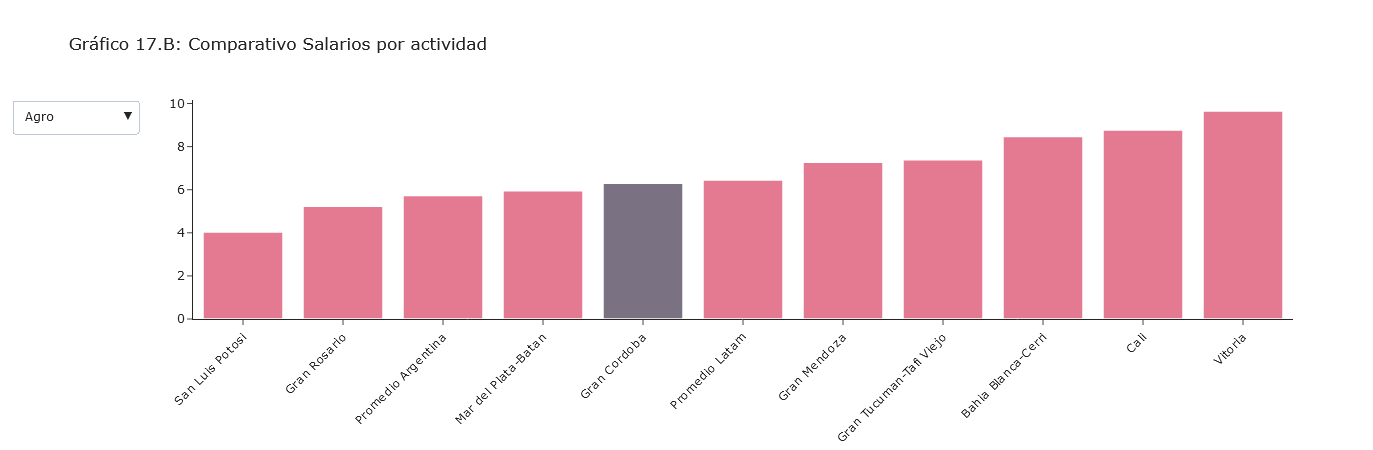

In [380]:
fig = go.Figure(data=[go.Bar( x=df_dict[list(df_dict.keys())[0]]['City'], y=df_dict[list(df_dict.keys())[0]]['Salario'] , marker={'color': df_dict[list(df_dict.keys())[0]]['color']})
                     ])

updatemenus = [{'buttons': [
            {
                'method': 'update',
                'label': list(df_dict.keys())[0],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[0]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[0]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[0]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[1],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[1]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[1]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[1]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[2],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[2]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[2]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[2]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[3],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[3]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[3]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[3]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[4],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[4]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[4]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[4]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[5],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[5]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[5]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[5]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[6],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[6]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[6]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[6]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[7],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[7]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[7]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[7]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[8],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[8]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[8]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[8]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[9],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[9]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[9]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[9]]['color']}]
                    }               
                ]
            }

        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text='Gráfico 17.B: Comparativo Salarios por actividad' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/wages.html",full_html=False,include_plotlyjs='cdn')

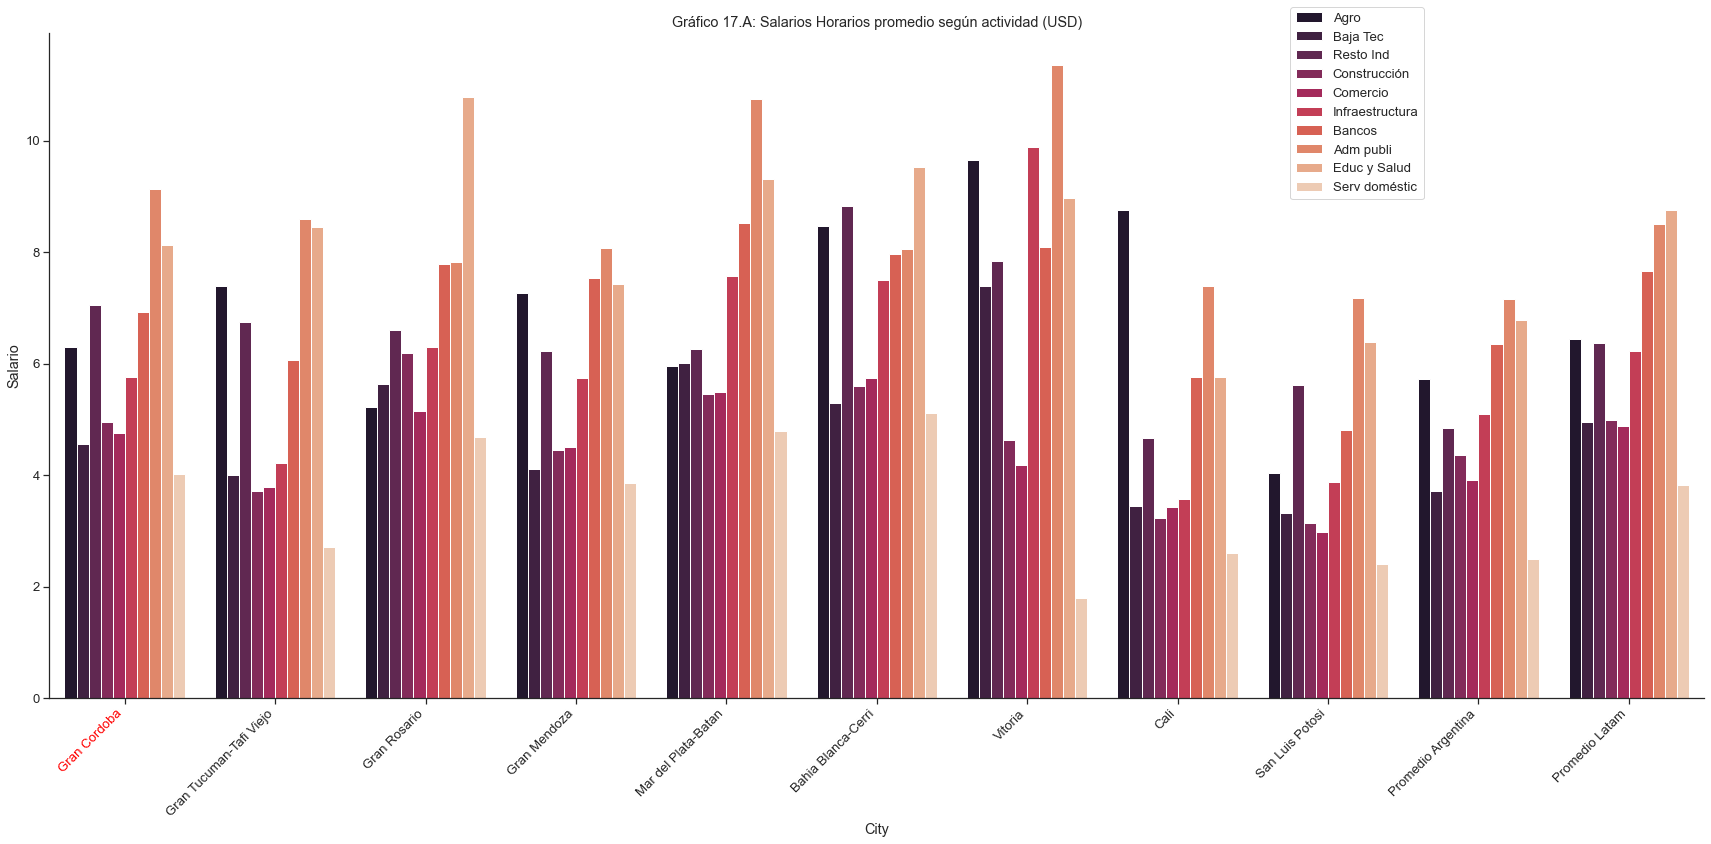

In [92]:
fig, ax = plt.subplots(1,1,figsize=(24,12)) #,constrained_layout=True

sns.barplot(x='City', y='Salario', hue='Actividad', data=plot , ax = ax, palette='rocket').set_title('Gráfico 17.A: Salarios Horarios promedio según actividad (USD)')

#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc=(0.75,0.75))
ax.set_xticklabels(plot['City'].unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_xticklabels()[0].set_color('red')

plt.savefig("informe/images/salarios.png",bbox_inches='tight')

### Facilitación de Negocios

Homicidios

arg

In [383]:
ind = [('Cordoba','Capital'),('Santa Fe','Rosario'),('Buenos Aires','Bahia Blanca'),('Buenos Aires','General Pueyrredon'),('Tucuman','Capital'),('Mendoza','Capital')]

In [384]:
homicidios_arg = pd.read_excel('c:\\Users\\Franco\\Dropbox\\files\\Homicidios\\arg\\homicidios_ar.xlsx',index_col=[0,1,2])

In [385]:
harg = homicidios_arg.loc[idx[:,:,2016]].loc[ind]

In [386]:
harg['City'] = ['Gran Cordoba','Gran Rosario','Bahia Blanca-Cerri','Mar del Plata-Batan','Gran Tucuman-Tafi Viejo','Gran Mendoza']

In [387]:
harg = harg.reset_index().set_index('City').drop(columns=['Provincia','Departamento','provincia_id','dpto_id','codigo_delito_agrupado_nombre','cantidad_hechos'])

In [388]:
harg = harg.join(cw.loc[:,'pops'])

In [389]:
harg['Homicidios cada 100.000 hab.'] = harg['cantidad_victimas'] / (harg['pops']*10)

In [390]:
harg = harg.droplevel(0).drop(columns=['pops','cantidad_victimas'])

Bra

In [392]:
hbra_tasa = pd.read_excel('c:\\Users\\Franco\\Dropbox\\files\\Homicidios\\bra\\homicidios_bra.xlsx',index_col=[0,1])

In [396]:
hbra = hbra_tasa.loc['Vitória',2016].droplevel(1).drop(columns='cod')

col

In [397]:
homicidios_col = pd.read_excel('c:\\Users\\Franco\\Dropbox\\files\\Homicidios\\col\\homicidios_col.xlsx',index_col=[0,1])

In [398]:
hcol = homicidios_col.reset_index().loc[homicidios_col.reset_index()['City']=='Cali',:].drop(columns=['Year','Departamento']).set_index('City')

#### Plot

In [399]:
homicidios_ref = harg.append(hcol).append(hbra).sort_values('Homicidios cada 100.000 hab.')

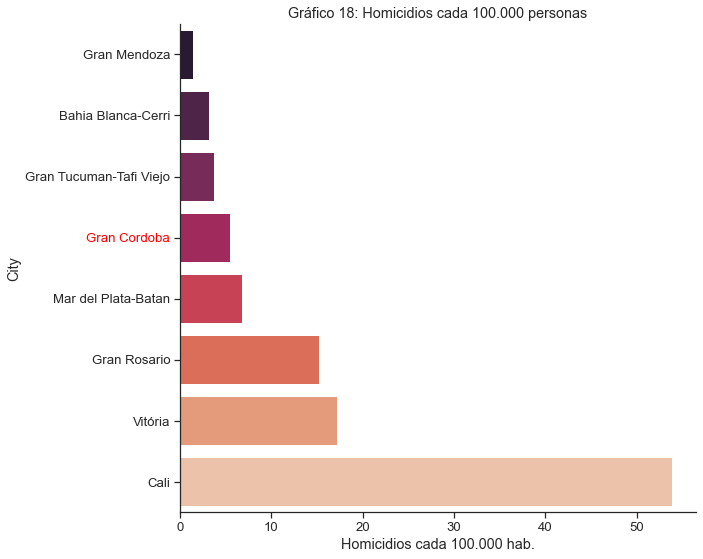

In [400]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Homicidios cada 100.000 hab.', y=homicidios_ref.index, data=homicidios_ref , palette='rocket' , orient='h' ).set_title('Gráfico 18: Homicidios cada 100.000 personas')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[3].set_color('red')

plt.savefig("informe/images/homicidios.png",bbox_inches='tight')

Properati

In [13]:
prop_com = prop_comercial[prop_comercial['price m2']!=np.inf]

In [14]:
medias = prop_com.groupby(['Country','Property Type']).mean()

In [15]:
mylist = ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay']

In [16]:
medias['City'] = [e for p in zip(mylist,mylist,mylist) for e in p]

In [17]:
medias = medias.reset_index().set_index(['Country','City'])

In [18]:
prop_com = prop_com.append(medias)

Gráfico

df

In [19]:
refp = ref[:6] + ['Cali'] + ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay','Promedio Latam']

In [20]:
df = prop_com.loc[idx[:,refp],['Property Type','price m2']].droplevel(0).reset_index()

In [21]:
df = df.rename(columns={'index':'City'})

In [22]:
df1=df[df['Property Type']=='Depósito'].sort_values('price m2').dropna()
df2=df[df['Property Type']=='Local comercial'].sort_values('price m2').dropna()
df3=df[df['Property Type']=='Oficina'].sort_values('price m2').dropna()

In [23]:
cl = [e for e in sns.color_palette('rocket',20)]
cl2 = [(int(t[0]*255), int(t[1]*255) , int(t[2]*255)) for t in cl]
colors = ['#%02x%02x%02x' % e for e in cl2]

In [24]:
color2 = [colors[2]]*12
color4 = [colors[4]]*12
color6 = [colors[0]]*12

In [25]:
color2[2]=colors[8]
color4[1]=colors[8]
color6[9]=colors[8]

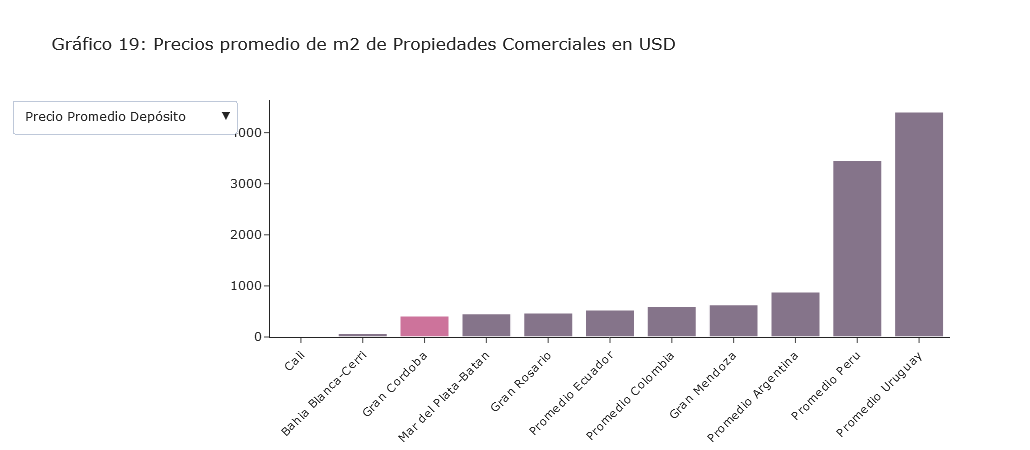

In [26]:
fig = go.Figure(data=[go.Bar( x=df1['City'], y=df1['price m2'] , marker={'color': color2})
                     ])

updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'Precio Promedio Depósito',
                'args': [
                    {'y': [df1['price m2']],
                     'x': [df1['City']],
                     'marker':[{'color': color2}]
                    },  
                ]
            },
            {
                'method': 'update',
                'label': 'Precio Promedio Local comercial',
                'args': [
                    {'y': [df2['price m2']],
                     'x': [df2['City']],
                     'marker':[{'color': color4}]
                    },
                ]
            },
            {
                'method': 'update',
                'label': 'Precio Promedio Oficina',
                'args': [
                    {'y': [df3['price m2']],
                     'x': [df3['City']],
                     'marker':[{'color': color6}]
                    },
                ]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text='Gráfico 19: Precios promedio de m2 de Propiedades Comerciales en USD' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/prope.html",full_html=False,include_plotlyjs='cdn')

#### Sueldos x vivienda (promedio)

In [48]:
mcon = prope_vi['Cantidad de salarios mensuales para adquirir Propiedad 60m2'].to_frame().groupby('Country').mean()
mcon['City'] = ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay']
mcon = mcon.reset_index().set_index(['Country','City'])

In [30]:
m = pd.DataFrame({'Country':['Latam'],'City':['Promedio Latam'],'Cantidad de salarios mensuales para adquirir Propiedad 60m2':[prope_vi['Cantidad de salarios mensuales para adquirir Propiedad 60m2'].mean()]}).set_index(['Country','City'])

In [33]:
refp = ref[:6] + ['Cali'] + ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay','Promedio Latam']

In [56]:
wagexcasa = prope_vi.append(m).append(mcon).loc[idx[:,refp],'Cantidad de salarios mensuales para adquirir Propiedad 60m2'].droplevel(0).to_frame().sort_values('Cantidad de salarios mensuales para adquirir Propiedad 60m2')
wagexcasa['color'] = colors[10]
wagexcasa.at['Gran Cordoba','color'] = colors[1]
wagexcasa = wagexcasa.reset_index()

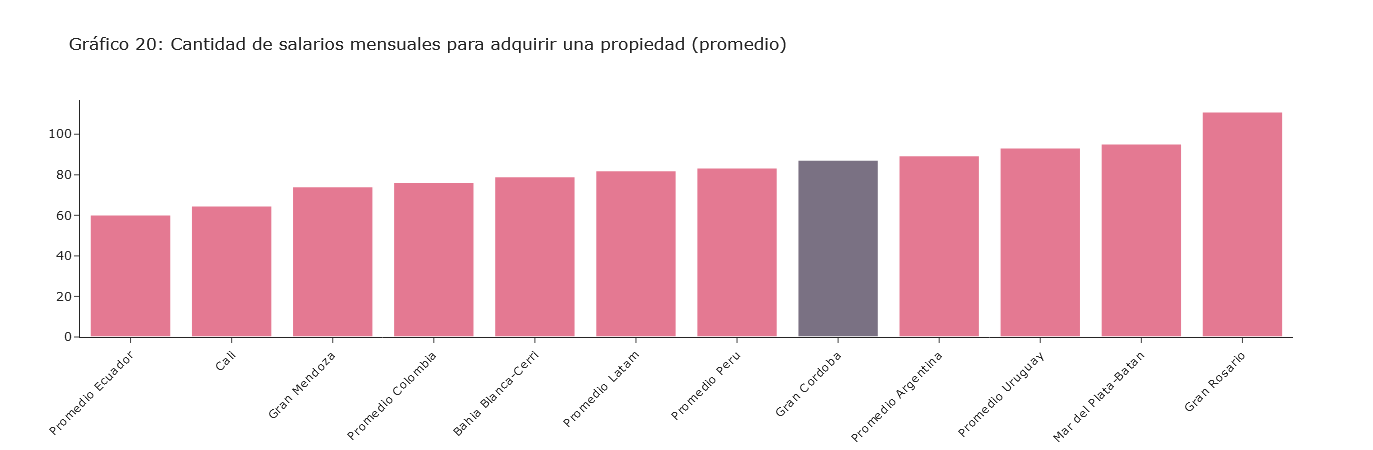

In [58]:
fig = go.Figure(data=[go.Bar(x=wagexcasa['City'], y=wagexcasa['Cantidad de salarios mensuales para adquirir Propiedad 60m2'] , marker={'color': wagexcasa['color']})])

fig.update_layout(template="simple_white" , title_text='Gráfico 20: Cantidad de salarios mensuales para adquirir una propiedad (promedio)' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/vivienda.html",full_html=False,include_plotlyjs='cdn')

3 Biggest obstacles

In [507]:
es = pd.read_excel(dbox+'es.xlsx',index_col=[0,1])

In [508]:
cols = es.columns[1:-3].str.replace('Percent of firms choosing ','').str.replace(' as their biggest obstacle','')

In [509]:
mydict = dict(zip(es.columns[1:-3].tolist(),cols))

In [510]:
es = es.rename(columns=mydict)

In [511]:
bobs = es.drop(columns=['City old','City2','_merge','Year']).loc[('Argentina','Gran Cordoba')].sort_values(ascending=False).to_frame().T.T.droplevel(0, axis=1).rename(columns={'Gran Cordoba':'Porcentaje de Firmas'})

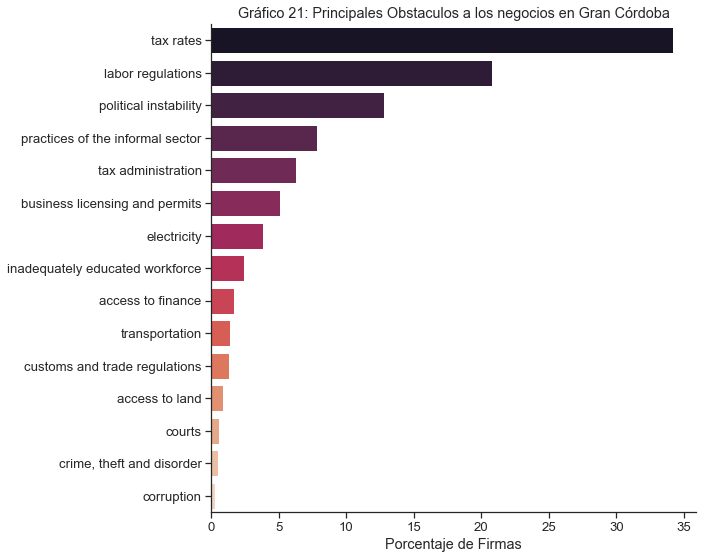

In [513]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Porcentaje de Firmas', y=bobs.index, data=bobs , palette='rocket' , orient='h' ).set_title('Gráfico 21: Principales Obstaculos a los negocios en Gran Córdoba')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

plt.tight_layout()
#plt.gca().get_yticklabels()[3].set_color('red')

plt.savefig("informe/images/biggest_obs.png",bbox_inches='tight')